# Results: Metrics, Visualizations, Statistics, Error Analysis

Notebook to keep track of our results for all the models we experimented with. The results from this notebook are used in our final writeup.

In [48]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
from model_utils import *
from pyramid_wrapper import *
from data_utils import *
from constants import *
from utils import *
import vis
from tabulate import tabulate
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tflearn.data_utils import to_categorical, pad_sequences
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style


import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Quantitative results

1. Pyramid model

In [4]:
pyramid_model = PyramidWrapper(checkpoint_model_id="pyramid_cifar100")

models loaded
Checkpoint loaded.


In [22]:
fine_label_names, coarse_label_names = load_cifar100_label_names(label_type='all')

load the full test set and do a linear search to find the best confidence threshold. If confidence higher than threshold, model will predict fine, otherwise will predict coarse

In [12]:
X, Y, fine_or_coarse = load_data_pyramid(return_subset='test_only')

cifar100
loading cifar batch training batch 1 of 1
loading cifar batch testing batch 1 of 1
mean: 121.936059453
std dev: 67.2413055571
Normalizing data
Accuracy for coarse predictions: 0.4419
Accuracy for fine predictions: 0.2435
using confid_threshold: 65
[ 97.85082936  98.10798168  48.62301052 ...,  99.66115355  60.58644652
  72.99716473]
predicted fine label 4955 times out of 10000 total samples.


In [31]:
mean_pixel = 121.936059453

In [14]:
evaluate_predictions(pyramid_model, X, Y, fine_or_coarse, confid_threshold=None)

Accuracy for coarse predictions: 0.4419
Accuracy for fine predictions: 0.2435
[ 97.85082936  98.10798168  48.62301052 ...,  99.66115355  60.58644652
  72.99716473]
predicted fine label 5466 times out of 10000 total samples.
confid_threshold: 60, Accuracy for predict coarse OR fine: 0.287
[ 97.85082936  98.10798168  48.62301052 ...,  99.66115355  60.58644652
  72.99716473]
predicted fine label 5345 times out of 10000 total samples.
confid_threshold: 61, Accuracy for predict coarse OR fine: 0.2867
[ 97.85082936  98.10798168  48.62301052 ...,  99.66115355  60.58644652
  72.99716473]
predicted fine label 5250 times out of 10000 total samples.
confid_threshold: 62, Accuracy for predict coarse OR fine: 0.287
[ 97.85082936  98.10798168  48.62301052 ...,  99.66115355  60.58644652
  72.99716473]
predicted fine label 5156 times out of 10000 total samples.
confid_threshold: 63, Accuracy for predict coarse OR fine: 0.2875
[ 97.85082936  98.10798168  48.62301052 ...,  99.66115355  60.58644652
  72.

In [6]:
test_subsets = ["seen_fine", "seen_coarse", "unseen"] 
# the test subset names refer to whether the fine / coarse classes in those sets have been trained on before by the model.

Load the test data subsets

In [7]:
X_test_A, y_test_A, fine_or_coarse_A, X_test_B, y_test_B, fine_or_coarse_B, X_test_C, y_test_C, fine_or_coarse_C = load_pyramid_test_subset(test_subset="all")

cifar100
loading cifar batch training batch 1 of 1
loading cifar batch testing batch 1 of 1
mean: 121.936059453
std dev: 67.2413055571
Normalizing data


In [9]:
evaluate_predictions(pyramid_model, X_test_A, y_test_A, fine_or_coarse_A, confid_threshold=None)

Accuracy for coarse predictions: 0.65075
Accuracy for fine predictions: 0.60875
[ 98.10798168  11.4803046   74.90355372 ...,  34.68356133  99.66115355
  60.58644652]
predicted fine label 3011 times out of 4000 total samples.
confid_threshold: 50, Accuracy for predict coarse OR fine: 0.55275
[ 98.10798168  11.4803046   74.90355372 ...,  34.68356133  99.66115355
  60.58644652]
predicted fine label 2983 times out of 4000 total samples.
confid_threshold: 51, Accuracy for predict coarse OR fine: 0.54975
[ 98.10798168  11.4803046   74.90355372 ...,  34.68356133  99.66115355
  60.58644652]
predicted fine label 2941 times out of 4000 total samples.
confid_threshold: 52, Accuracy for predict coarse OR fine: 0.54625
[ 98.10798168  11.4803046   74.90355372 ...,  34.68356133  99.66115355
  60.58644652]
predicted fine label 2914 times out of 4000 total samples.
confid_threshold: 53, Accuracy for predict coarse OR fine: 0.5445
[ 98.10798168  11.4803046   74.90355372 ...,  34.68356133  99.66115355
  

Test subset A: Contains all test samples belonging to the fine-grained classes the CNN part of the model has trained on before and where the model was fed both fine and coarse classes. (2 fine-granded classes per coarse class, 40% of the test set)

In [17]:
best_confid_threshold = 74
evaluate_predictions(pyramid_model, X_test_A, y_test_A, fine_or_coarse_A, confid_threshold=best_confid_threshold)

Accuracy for coarse predictions: 0.65075
Accuracy for fine predictions: 0.60875
[ 98.10798168  11.4803046   74.90355372 ...,  34.68356133  99.66115355
  60.58644652]
predicted fine label 2214 times out of 4000 total samples.
confid_threshold: 74, Accuracy for predict coarse OR fine: 0.4695


Test subset B: Contains all test samples belong to the 40 fine classes, where the model has only seen their coarse label, but not their fine label. (2 fine-granded classes per coarse class, 40% of the test set)

In [18]:
evaluate_predictions(pyramid_model, X_test_B, y_test_B, fine_or_coarse_B, confid_threshold=best_confid_threshold)

Accuracy for coarse predictions: 0.2915
Accuracy for fine predictions: 0.0
[ 97.85082936  48.62301052  45.8288461  ...,  95.22877932  89.86353278
  72.99716473]
predicted fine label 1232 times out of 4000 total samples.
confid_threshold: 74, Accuracy for predict coarse OR fine: 0.16475


Test subset C: Contains all test samples belong to the 20 fine classes, the model has never seen before. (where seen refers to the labels.) (1 fine-granded class per coarse class, 20% of the test set)

In [20]:
evaluate_predictions(pyramid_model, X_test_C, y_test_C, fine_or_coarse_C, confid_threshold=best_confid_threshold)

Accuracy for coarse predictions: 0.325
Accuracy for fine predictions: 0.0
[ 98.34507704  85.47298908  16.52573198 ...,  95.54353952  54.34818864
  67.40775704]
predicted fine label 723 times out of 2000 total samples.
confid_threshold: 74, Accuracy for predict coarse OR fine: 0.182


In [56]:
def denormalize_image(img,mean=121):
    img = (img + mean)
    low, high = img.min(), img.max()
    img = 255.0 * (img - low) / (high - low)
    return img.astype(np.uint8)

In [61]:
def examine_images_and_predictions(model, X, y):
    fine_pred_probs, coarse_pred_probs = pyramid_model.predict_both_fine_and_coarse(X)

    coarse_pred_classes = np.argmax(coarse_pred_probs, axis=1)
    fine_pred_classes = np.argmax(fine_pred_probs, axis=1)

    y_fine, y_coarse = y[:,0], y[:,1]
    
    for i in xrange(50):
        img = X[i]
        img = denormalize_image(img, mean=MEAN_PIXEL_CIFAR)
        plt.figure(num=None, figsize=(1, 1), dpi=32, facecolor='w', edgecolor='k')
        plt.imshow(img.astype(np.uint8), interpolation='nearest')
        plt.axis('off')
        plt.show()
        c_pred_label = coarse_label_names[coarse_pred_classes[i]]
        c_true_label = coarse_label_names[y_coarse[i]]
        f_pred_label = fine_label_names[fine_pred_classes[i]]
        f_true_label = fine_label_names[y_fine[i]]

        labels = np.array([['coarse', c_pred_label, c_true_label],['fine', f_pred_label, f_true_label]])
    #     pd.DataFrame(labels, ['coarse', 'fine'], ['predicted', 'true'])
        print tabulate(labels, headers=['', 'Predicted Label', 'True Label'], tablefmt='orgtbl')
    #     print ("coarse: \npredicted: {} \ttrue: {}\nfine: \npredicted: {} \ttrue: {}".format(c_pred_label, c_true_label, f_pred_label, f_true_label))



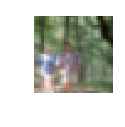

|        | Predicted Label              | True Label                   |
|--------+------------------------------+------------------------------|
| coarse | large_natural_outdoor_scenes | large_natural_outdoor_scenes |
| fine   | forest                       | forest                       |


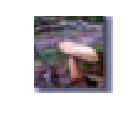

|        | Predicted Label          | True Label           |
|--------+--------------------------+----------------------|
| coarse | non-insect_invertebrates | fruit_and_vegetables |
| fine   | camel                    | mushroom             |


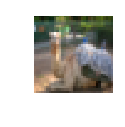

|        | Predicted Label                | True Label                     |
|--------+--------------------------------+--------------------------------|
| coarse | large_omnivores_and_herbivores | large_omnivores_and_herbivores |
| fine   | camel                          | camel                          |


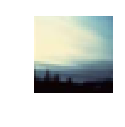

|        | Predicted Label              | True Label                   |
|--------+------------------------------+------------------------------|
| coarse | large_natural_outdoor_scenes | large_natural_outdoor_scenes |
| fine   | cloud                        | cloud                        |


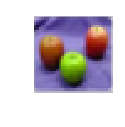

|        | Predicted Label      | True Label           |
|--------+----------------------+----------------------|
| coarse | fruit_and_vegetables | fruit_and_vegetables |
| fine   | apple                | apple                |


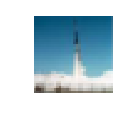

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | vehicles_2        | vehicles_2   |
| fine   | rocket            | rocket       |


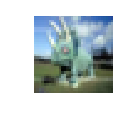

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | trees             | reptiles     |
| fine   | maple_tree        | dinosaur     |


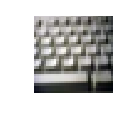

|        | Predicted Label              | True Label                   |
|--------+------------------------------+------------------------------|
| coarse | household_electrical_devices | household_electrical_devices |
| fine   | keyboard                     | keyboard                     |


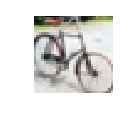

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | vehicles_1        | vehicles_1   |
| fine   | bicycle           | bicycle      |


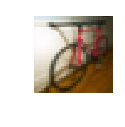

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | food_containers   | vehicles_1   |
| fine   | boy               | bicycle      |


In [65]:
examine_images_and_predictions(pyramid_model, X_test_A, y_test_A)

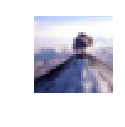

|        | Predicted Label   | True Label                   |
|--------+-------------------+------------------------------|
| coarse | aquatic_mammals   | large_natural_outdoor_scenes |
| fine   | dolphin           | mountain                     |


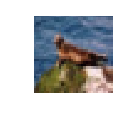

|        | Predicted Label                | True Label      |
|--------+--------------------------------+-----------------|
| coarse | large_omnivores_and_herbivores | aquatic_mammals |
| fine   | crocodile                      | seal            |


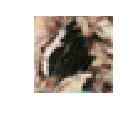

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | small_mammals     | insects      |
| fine   | beetle            | butterfly    |


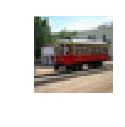

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | vehicles_1        | vehicles_2   |
| fine   | bus               | streetcar    |


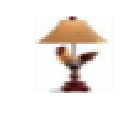

|        | Predicted Label   | True Label                   |
|--------+-------------------+------------------------------|
| coarse | food_containers   | household_electrical_devices |
| fine   | chair             | lamp                         |


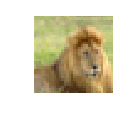

|        | Predicted Label                | True Label       |
|--------+--------------------------------+------------------|
| coarse | large_omnivores_and_herbivores | large_carnivores |
| fine   | crab                           | lion             |


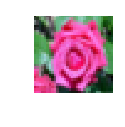

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | flowers           | flowers      |
| fine   | orchid            | rose         |


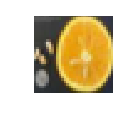

|        | Predicted Label   | True Label           |
|--------+-------------------+----------------------|
| coarse | flowers           | fruit_and_vegetables |
| fine   | apple             | orange               |


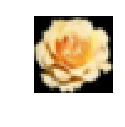

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | food_containers   | flowers      |
| fine   | hamster           | rose         |


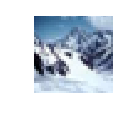

|        | Predicted Label               | True Label                   |
|--------+-------------------------------+------------------------------|
| coarse | large_man-made_outdoor_things | large_natural_outdoor_scenes |
| fine   | keyboard                      | mountain                     |


In [63]:
examine_images_and_predictions(pyramid_model, X_test_B, y_test_B)

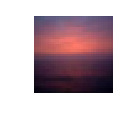

|        | Predicted Label              | True Label                   |
|--------+------------------------------+------------------------------|
| coarse | large_natural_outdoor_scenes | large_natural_outdoor_scenes |
| fine   | cloud                        | sea                          |


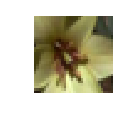

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | insects           | flowers      |
| fine   | bee               | tulip        |


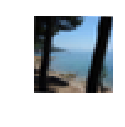

|        | Predicted Label              | True Label                   |
|--------+------------------------------+------------------------------|
| coarse | household_electrical_devices | large_natural_outdoor_scenes |
| fine   | keyboard                     | sea                          |


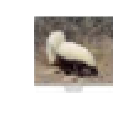

|        | Predicted Label   | True Label     |
|--------+-------------------+----------------|
| coarse | reptiles          | medium_mammals |
| fine   | crocodile         | skunk          |


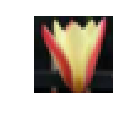

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | flowers           | flowers      |
| fine   | apple             | tulip        |


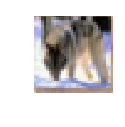

|        | Predicted Label   | True Label       |
|--------+-------------------+------------------|
| coarse | small_mammals     | large_carnivores |
| fine   | mouse             | wolf             |


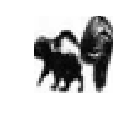

|        | Predicted Label   | True Label     |
|--------+-------------------+----------------|
| coarse | fish              | medium_mammals |
| fine   | camel             | skunk          |


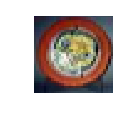

|        | Predicted Label              | True Label      |
|--------+------------------------------+-----------------|
| coarse | household_electrical_devices | food_containers |
| fine   | clock                        | plate           |


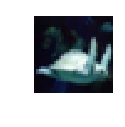

|        | Predicted Label              | True Label   |
|--------+------------------------------+--------------|
| coarse | household_electrical_devices | reptiles     |
| fine   | bowl                         | turtle       |


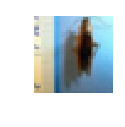

|        | Predicted Label   | True Label   |
|--------+-------------------+--------------|
| coarse | food_containers   | insects      |
| fine   | flatfish          | cockroach    |


In [64]:
examine_images_and_predictions(pyramid_model, X_test_C, y_test_C)